<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r7_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r7-good.csv?token=AKVFSOAXUCINTGXHGXREUCC6X2V3Y"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r7-mal.csv?token=AKVFSOFBGUORU6IP535ZHLS6X2V4C"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [339]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,23,0,3,1,1,4,3,9,0,0,23,7,0,4,4,1.0,20,3,1,3,3,9,0,1,4,0,3,27,9,1
1,31,4,0,2,1,4,3,9,23,7,18,2,0,2,0,0.0,4,2,2,3,4,12,0,2,8,0,6,27,18,1
2,86,0,3,3,1,4,3,9,18,2,23,7,0,2,2,1.0,12,1,3,3,3,9,0,3,12,0,9,27,27,1
3,364,0,3,1,1,4,3,9,0,0,23,7,3,4,4,1.0,20,1,1,1,1,1,0,1,4,12,3,27,9,1
4,372,4,0,2,1,4,3,10,23,7,18,2,3,2,0,0.0,4,1,1,1,1,1,0,2,8,24,6,30,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,3250723,4,0,6,4,2,3,9,23,7,18,2,10018,2,0,0.0,25,1,1,1,1,1,0,24,48,480864,18,27,54,1
8162,3250730,4,0,6,5,3,3,9,23,7,18,2,10018,2,0,0.0,32,1,1,1,1,1,0,30,90,901620,18,27,54,1
8163,3250731,4,0,2,1,4,3,10,23,7,18,2,10019,2,0,0.0,32,1,1,1,1,1,0,2,8,80152,6,30,18,1
8164,3250732,4,0,7,1,4,3,11,23,7,0,0,10018,4,0,0.0,6,1,1,1,1,1,0,7,28,280504,21,33,63,1


In [340]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,19,0,3,1,1,4,3,9,1,1,23,7,1,3,3,1.00,16,5,1,5,5,25,0,1,4,4,3,27,9,0
1,23,0,3,1,1,4,3,10,0,0,23,7,0,4,4,1.00,20,4,2,5,8,40,0,1,4,0,3,30,9,0
2,27,4,0,2,1,4,3,9,23,7,18,2,1,2,0,0.00,4,3,3,5,9,45,0,2,8,8,6,27,18,0
3,31,4,0,2,1,4,3,10,23,7,18,2,0,2,0,0.00,4,2,4,5,8,40,0,2,8,0,6,30,18,0
4,82,0,3,3,1,4,3,9,18,2,23,7,1,2,2,1.00,12,1,5,5,5,25,0,3,12,12,9,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,2008981,1,3,5,3,2,3,9,0,0,27,11,11064,5,4,0.80,34,1,1,1,1,1,3,15,30,331920,15,27,45,0
7963,2008988,1,3,5,4,2,3,9,0,0,27,11,11064,5,4,0.80,41,1,1,1,1,1,3,20,40,442560,15,27,45,0
7964,2008995,1,3,5,5,3,3,9,0,0,27,11,11064,5,4,0.80,48,1,1,1,1,1,3,25,75,829800,15,27,45,0
7965,2008996,1,3,1,1,4,3,10,0,0,27,11,11065,5,4,0.80,48,1,1,1,1,1,3,1,4,44260,3,30,9,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [342]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [344]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,19,0,3,1,1,4,3,9,1,1,23,7,1,3,3,1.0,16,5,1,5,5,25,0,1,4,4,3,27,9,0
1,23,0,3,1,1,4,3,9,0,0,23,7,0,4,4,1.0,20,3,1,3,3,9,0,1,4,0,3,27,9,1
2,23,0,3,1,1,4,3,10,0,0,23,7,0,4,4,1.0,20,4,2,5,8,40,0,1,4,0,3,30,9,0
3,27,4,0,2,1,4,3,9,23,7,18,2,1,2,0,0.0,4,3,3,5,9,45,0,2,8,8,6,27,18,0
4,31,4,0,2,1,4,3,10,23,7,18,2,0,2,0,0.0,4,2,4,5,8,40,0,2,8,0,6,30,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16128,3250723,4,0,6,4,2,3,9,23,7,18,2,10018,2,0,0.0,25,1,1,1,1,1,0,24,48,480864,18,27,54,1
16129,3250730,4,0,6,5,3,3,9,23,7,18,2,10018,2,0,0.0,32,1,1,1,1,1,0,30,90,901620,18,27,54,1
16130,3250731,4,0,2,1,4,3,10,23,7,18,2,10019,2,0,0.0,32,1,1,1,1,1,0,2,8,80152,6,30,18,1
16131,3250732,4,0,7,1,4,3,11,23,7,0,0,10018,4,0,0.0,6,1,1,1,1,1,0,7,28,280504,21,33,63,1


In [345]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.005703,0.014424,0.031435,0.022551,-0.033329,NaN,-0.015019,-0.029473,-0.043955,0.012190,0.015152,0.841024,0.079054,0.066244,0.017590,0.057228,-0.249120,-0.249115,-0.296553,-0.222175,-0.167092,0.033388,0.024740,0.017616,0.437397,0.031435,-0.015019,0.031435,0.449091
outport,-0.005703,1.000000,-0.963413,0.355783,-0.022055,0.032566,NaN,0.643468,0.876704,0.940129,-0.631852,-0.648728,-0.008189,-0.561772,-0.903529,-0.990599,-0.475742,0.032892,0.124285,0.093553,0.091874,0.076835,-0.320602,0.115631,0.118120,0.080056,0.355783,0.643468,0.355783,-0.000344
inport,0.014424,-0.963413,1.000000,-0.355466,0.041908,-0.061872,NaN,-0.665009,-0.940073,-0.986022,0.761213,0.814046,0.019738,0.724049,0.955820,0.943680,0.522017,-0.056154,-0.133941,-0.113146,-0.109517,-0.093404,0.562745,-0.101181,-0.110913,-0.069382,-0.355466,-0.665009,-0.355466,0.001768
cache_coherence_type,0.031435,0.355783,-0.355466,1.000000,0.422705,-0.623016,NaN,-0.017686,0.281486,0.332155,-0.342688,-0.276161,0.037380,-0.157096,-0.307401,-0.350427,-0.469203,0.033373,0.010386,0.026045,0.032525,0.028606,-0.158950,0.584922,0.460792,0.344635,1.000000,-0.017686,1.000000,0.008778
flit_id,0.022551,-0.022055,0.041908,0.422705,1.000000,-0.081935,NaN,-0.160259,-0.112082,-0.066247,0.152729,0.081286,0.027519,0.068541,0.084032,0.018837,0.497767,0.026283,-0.009145,0.010201,0.019221,0.012715,0.080085,0.976413,0.942251,0.708105,0.422705,-0.160259,0.422705,0.005705
flit_type,-0.033329,0.032566,-0.061872,-0.623016,-0.081935,1.000000,NaN,0.236292,0.165290,0.097701,-0.225173,-0.119891,-0.040888,-0.101014,-0.123876,-0.027831,0.359585,-0.022461,0.082598,0.035794,0.012534,0.008656,-0.118221,-0.189211,0.065284,0.043047,-0.623016,0.236292,-0.623016,-0.008223
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.015019,0.643468,-0.665009,-0.017686,-0.160259,0.236292,NaN,1.000000,0.613007,0.652259,-0.500640,-0.535077,-0.014915,-0.469441,-0.629534,-0.631273,-0.220807,0.043865,0.115145,0.094643,0.089089,0.075177,-0.365625,-0.093111,-0.049154,-0.049923,-0.017686,1.000000,-0.017686,-0.010540
src_ni,-0.029473,0.876704,-0.940073,0.281486,-0.112082,0.165290,NaN,0.613007,1.000000,0.970172,-0.756541,-0.819932,-0.028679,-0.816402,-0.974827,-0.855574,-0.602249,0.049412,0.141903,0.113872,0.103050,0.087378,-0.618387,0.023131,0.059583,0.029263,0.281486,0.613007,0.281486,-0.020427
src_router,-0.043955,0.940129,-0.986022,0.332155,-0.066247,0.097701,NaN,0.652259,0.970172,1.000000,-0.764447,-0.821192,-0.022838,-0.786947,-0.991436,-0.923810,-0.564481,0.063418,0.144802,0.123934,0.114294,0.095994,-0.585158,0.075029,0.093958,0.056206,0.332155,0.652259,0.332155,-0.060568


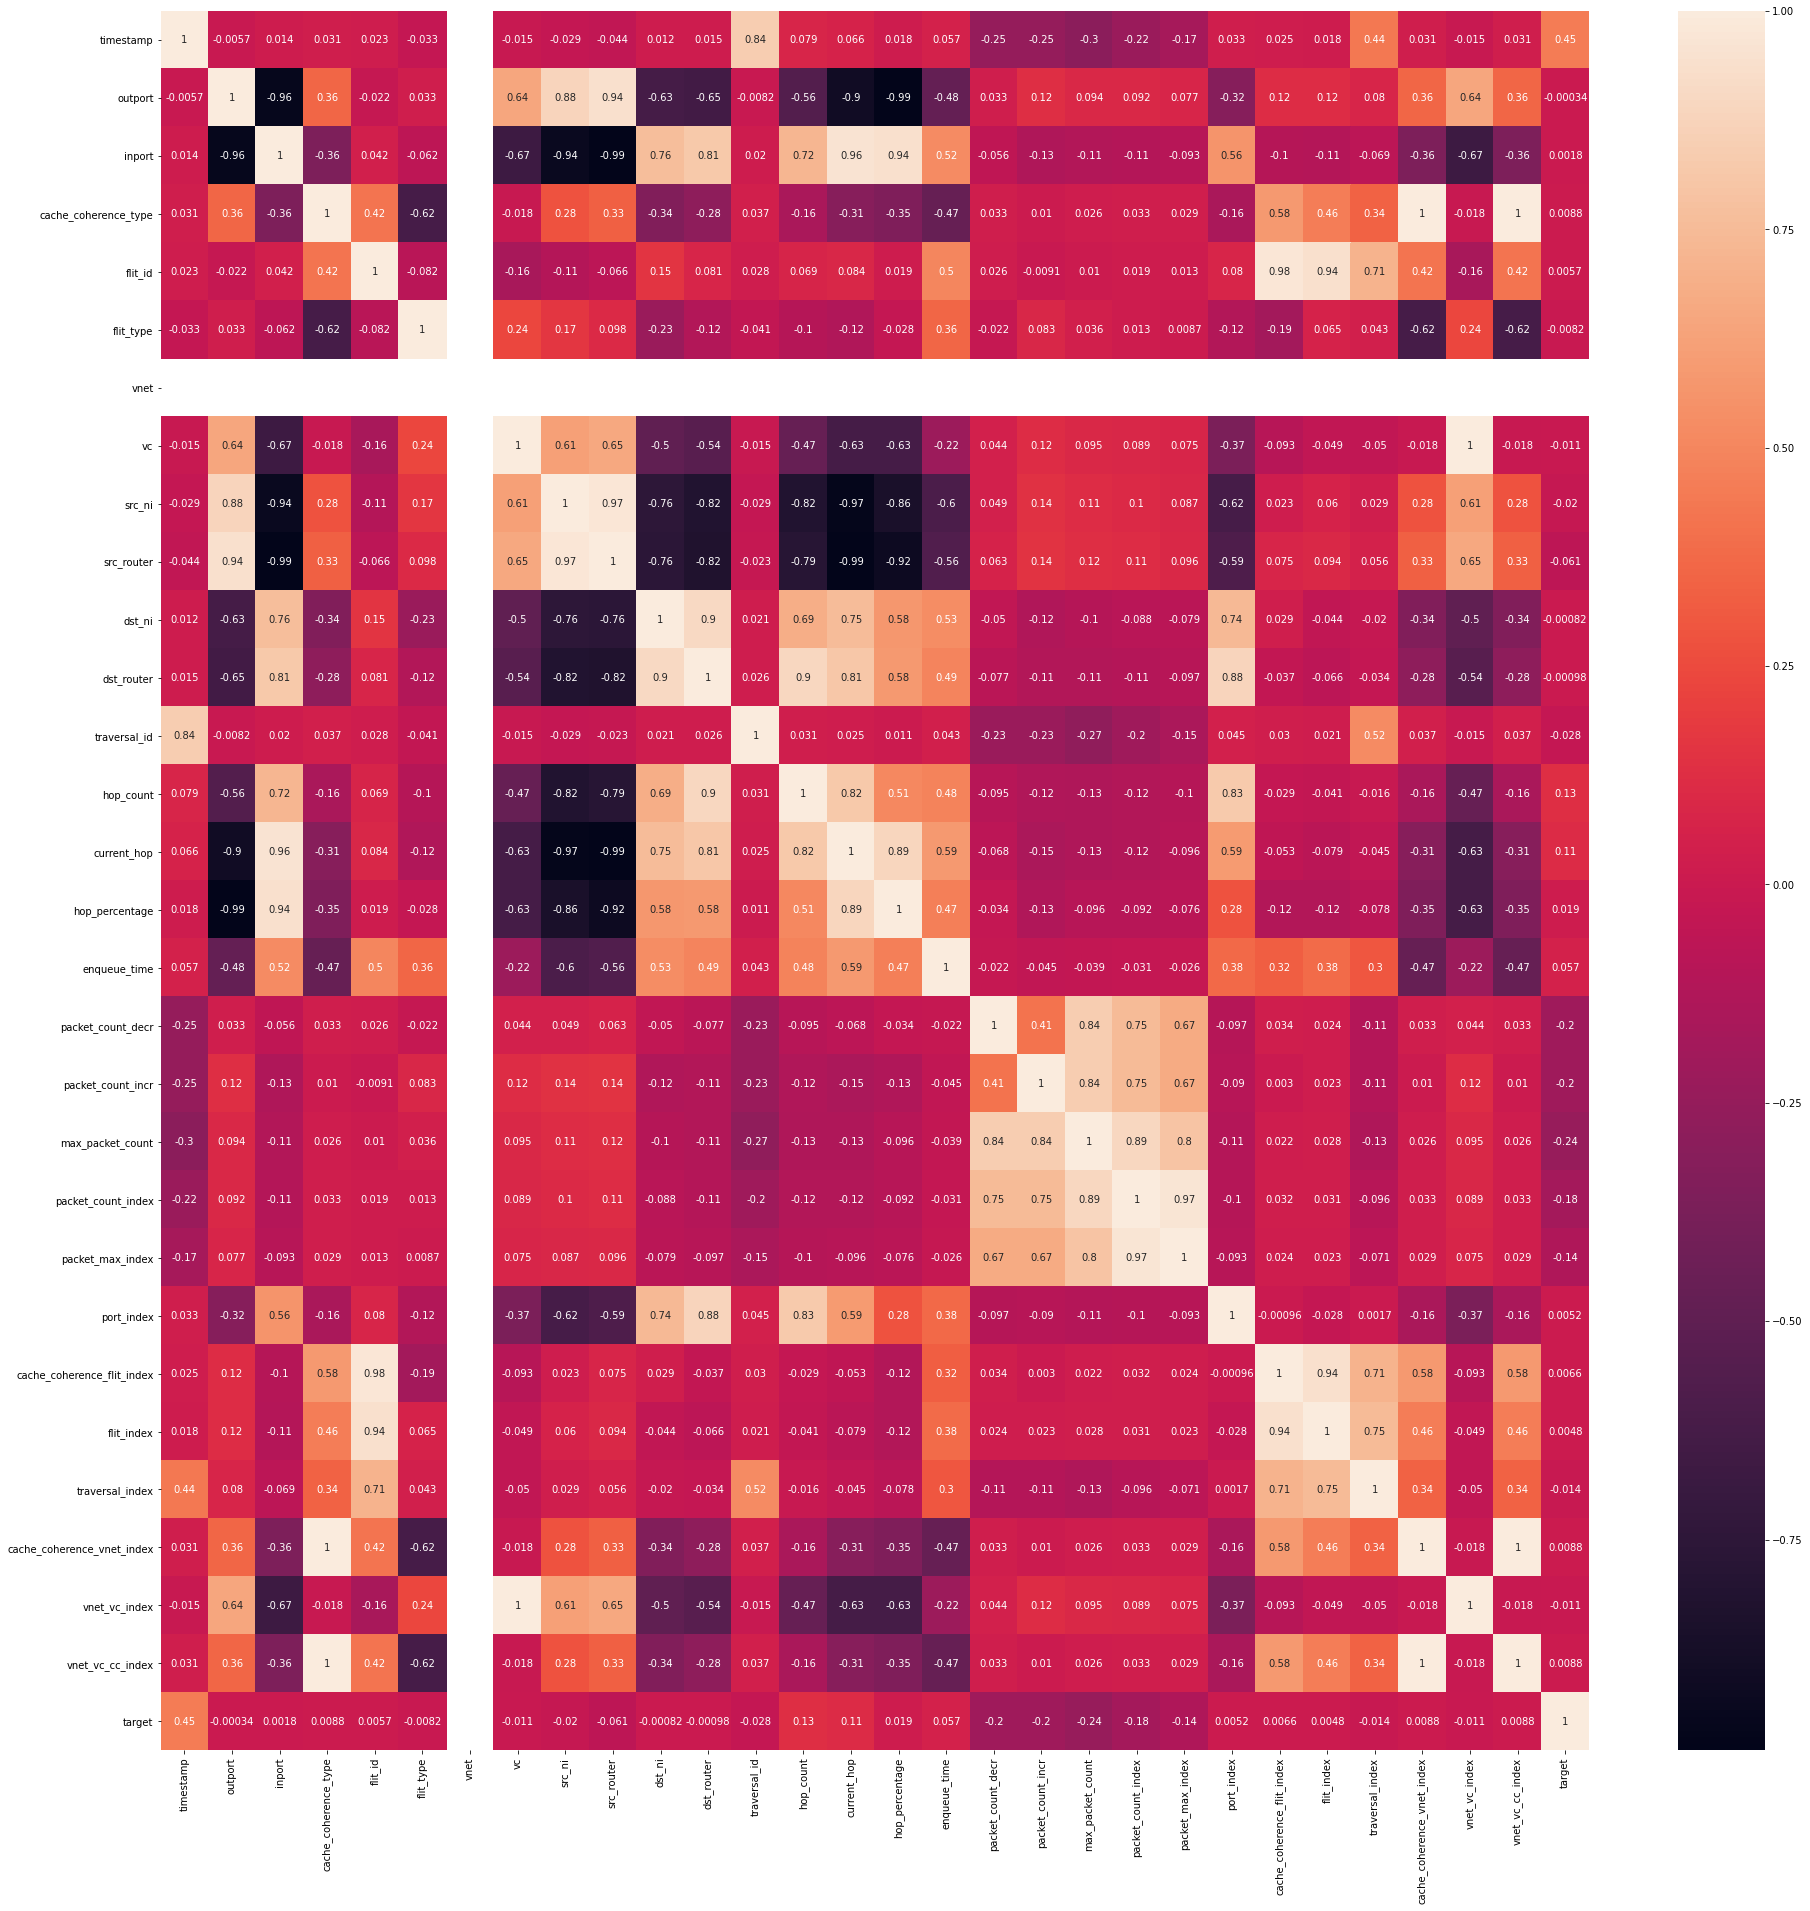

In [346]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [347]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,1,1,4,3,9,23,7,1,3,3,1.0,16,5,1,5,5,25,0,1,4,4,3,27,9
1,0,3,1,1,4,3,9,23,7,0,4,4,1.0,20,3,1,3,3,9,0,1,4,0,3,27,9
2,0,3,1,1,4,3,10,23,7,0,4,4,1.0,20,4,2,5,8,40,0,1,4,0,3,30,9
3,4,0,2,1,4,3,9,18,2,1,2,0,0.0,4,3,3,5,9,45,0,2,8,8,6,27,18
4,4,0,2,1,4,3,10,18,2,0,2,0,0.0,4,2,4,5,8,40,0,2,8,0,6,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16128,4,0,6,4,2,3,9,18,2,10018,2,0,0.0,25,1,1,1,1,1,0,24,48,480864,18,27,54
16129,4,0,6,5,3,3,9,18,2,10018,2,0,0.0,32,1,1,1,1,1,0,30,90,901620,18,27,54
16130,4,0,2,1,4,3,10,18,2,10019,2,0,0.0,32,1,1,1,1,1,0,2,8,80152,6,30,18
16131,4,0,7,1,4,3,11,0,0,10018,4,0,0.0,6,1,1,1,1,1,0,7,28,280504,21,33,63


In [348]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000090,0.25,0.75,1.0,0.222222,0.181818,0.000000,0.181818,0.027972,0.007249,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.0,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.50,1.00,1.0,0.296296,0.090909,0.000000,0.090909,0.013986,0.002416,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.741935,0.466667,0.000000,0.50,1.00,1.0,0.296296,0.136364,0.045455,0.181818,0.048951,0.011779,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
3,1.0,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.580645,0.133333,0.000090,0.00,0.00,0.0,0.000000,0.090909,0.090909,0.181818,0.055944,0.013289,0.0,0.034483,0.046512,0.000008,0.166667,0.000000,0.166667
4,1.0,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.580645,0.133333,0.000000,0.00,0.00,0.0,0.000000,0.045455,0.136364,0.181818,0.048951,0.011779,0.0,0.034483,0.046512,0.000000,0.166667,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16128,1.0,0.0,0.833333,0.75,0.333333,0.0,0.000000,0.580645,0.133333,0.904152,0.00,0.00,0.0,0.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.483523,0.833333,0.000000,0.833333
16129,1.0,0.0,0.833333,1.00,0.666667,0.0,0.000000,0.580645,0.133333,0.904152,0.00,0.00,0.0,0.518519,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.906606,0.833333,0.000000,0.833333
16130,1.0,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.580645,0.133333,0.904242,0.00,0.00,0.0,0.518519,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.080595,0.166667,0.333333,0.166667
16131,1.0,0.0,1.000000,0.00,1.000000,0.0,0.666667,0.000000,0.000000,0.904152,0.50,0.00,0.0,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.282055,1.000000,0.666667,1.000000


In [349]:
train_X[train_X.duplicated()].shape

(42, 26)

In [350]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.963413,0.355783,-0.022055,0.032566,NaN,0.643468,-0.631852,-0.648728,-0.008189,-0.561772,-0.903529,-0.990599,-0.475742,0.032892,0.124285,0.093553,0.091874,0.076835,-0.320602,0.115631,0.118120,0.080056,0.355783,0.643468,0.355783,-0.000344
inport,-0.963413,1.000000,-0.355466,0.041908,-0.061872,NaN,-0.665009,0.761213,0.814046,0.019738,0.724049,0.955820,0.943680,0.522017,-0.056154,-0.133941,-0.113146,-0.109517,-0.093404,0.562745,-0.101181,-0.110913,-0.069382,-0.355466,-0.665009,-0.355466,0.001768
cache_coherence_type,0.355783,-0.355466,1.000000,0.422705,-0.623016,NaN,-0.017686,-0.342688,-0.276161,0.037380,-0.157096,-0.307401,-0.350427,-0.469203,0.033373,0.010386,0.026045,0.032525,0.028606,-0.158950,0.584922,0.460792,0.344635,1.000000,-0.017686,1.000000,0.008778
flit_id,-0.022055,0.041908,0.422705,1.000000,-0.081935,NaN,-0.160259,0.152729,0.081286,0.027519,0.068541,0.084032,0.018837,0.497767,0.026283,-0.009145,0.010201,0.019221,0.012715,0.080085,0.976413,0.942251,0.708105,0.422705,-0.160259,0.422705,0.005705
flit_type,0.032566,-0.061872,-0.623016,-0.081935,1.000000,NaN,0.236292,-0.225173,-0.119891,-0.040888,-0.101014,-0.123876,-0.027831,0.359585,-0.022461,0.082598,0.035794,0.012534,0.008656,-0.118221,-0.189211,0.065284,0.043047,-0.623016,0.236292,-0.623016,-0.008223
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.643468,-0.665009,-0.017686,-0.160259,0.236292,NaN,1.000000,-0.500640,-0.535077,-0.014915,-0.469441,-0.629534,-0.631273,-0.220807,0.043865,0.115145,0.094643,0.089089,0.075177,-0.365625,-0.093111,-0.049154,-0.049923,-0.017686,1.000000,-0.017686,-0.010540
dst_ni,-0.631852,0.761213,-0.342688,0.152729,-0.225173,NaN,-0.500640,1.000000,0.900104,0.020948,0.686457,0.752060,0.577701,0.530655,-0.050081,-0.122795,-0.102897,-0.088405,-0.079091,0.741448,0.029250,-0.044072,-0.020429,-0.342688,-0.500640,-0.342688,-0.000824
dst_router,-0.648728,0.814046,-0.276161,0.081286,-0.119891,NaN,-0.535077,0.900104,1.000000,0.026158,0.896613,0.810763,0.580420,0.488833,-0.077314,-0.113882,-0.113801,-0.108657,-0.096586,0.876117,-0.037399,-0.065743,-0.034351,-0.276161,-0.535077,-0.276161,-0.000984
traversal_id,-0.008189,0.019738,0.037380,0.027519,-0.040888,NaN,-0.014915,0.020948,0.026158,1.000000,0.030728,0.024821,0.010893,0.042759,-0.225890,-0.225864,-0.268887,-0.199563,-0.148303,0.044501,0.029855,0.021117,0.519965,0.037380,-0.014915,0.037380,-0.027557


Principal Component Analysis

In [351]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-3.39748098e-01,  1.27995763e+00,  7.66296228e-01, ...,
         4.49578938e-01, -2.95259640e-01, -6.13983595e-02],
       [-5.25484016e-01,  1.25083200e+00,  7.26546022e-01, ...,
         4.31660530e-01, -2.09672224e-01,  7.38418856e-02],
       [-3.92319690e-01,  1.32677959e+00,  6.63123484e-01, ...,
         4.30285575e-01,  1.96885145e-01,  1.11485644e-01],
       ...,
       [ 1.36538954e+00,  1.05400352e+00, -1.39634170e-03, ...,
        -4.23181803e-01, -5.09497349e-01, -2.39965481e-01],
       [ 1.82200467e+00,  1.60090131e-01, -3.33137609e-01, ...,
        -4.87809871e-01,  2.78417642e-02,  9.83159370e-01],
       [-5.88050488e-02,  8.74110501e-01,  7.37620214e-01, ...,
        -4.54477133e-01, -3.61591381e-01,  3.62599684e-02]])

In [352]:
pca.explained_variance_ratio_

array([0.46867115, 0.1950111 , 0.10741859, 0.10060904, 0.040734  ,
       0.03340178, 0.0204362 ])

Text(0, 0.5, 'Variance')

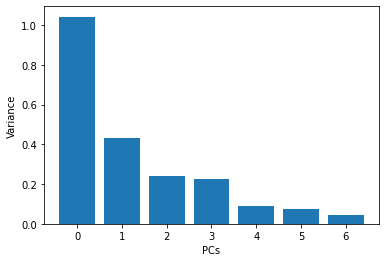

In [353]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [354]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.339748,1.279958,0.766296,-0.027868,0.449579,-0.295260,-0.061398
1,-0.525484,1.250832,0.726546,0.002276,0.431661,-0.209672,0.073842
2,-0.392320,1.326780,0.663123,0.148450,0.430286,0.196885,0.111486
3,1.316773,1.056431,-0.004498,0.171698,0.498763,-0.916877,-0.183642
4,1.447871,1.132120,-0.069819,0.317839,0.477763,-0.513027,-0.142394
...,...,...,...,...,...,...,...
16128,1.468009,-0.734841,0.100433,0.004212,-0.411032,-0.560996,-0.295831
16129,1.477737,-1.131853,0.387989,0.507272,-0.473332,-0.670318,-0.127894
16130,1.365390,1.054004,-0.001396,0.523312,-0.423182,-0.509497,-0.239965
16131,1.822005,0.160090,-0.333138,-0.020358,-0.487810,0.027842,0.983159


In [355]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-6.473093e-16,2.136431e-15,-2.213329e-15,6.644116e-17,-1.800814e-15,1.617650e-15,-0.037314
1,-6.473093e-16,1.000000e+00,1.105885e-15,9.979448e-16,1.693375e-16,9.596918e-16,1.588918e-15,-0.016132
2,2.136431e-15,1.105885e-15,1.000000e+00,-2.153485e-15,-2.866343e-16,2.679834e-15,1.963717e-15,-0.012793
3,-2.213329e-15,9.979448e-16,-2.153485e-15,1.000000e+00,-1.595507e-16,-3.359822e-16,5.355746e-16,0.002649
4,6.644116e-17,1.693375e-16,-2.866343e-16,-1.595507e-16,1.000000e+00,-4.223085e-16,3.589394e-16,0.008839
5,-1.800814e-15,9.596918e-16,2.679834e-15,-3.359822e-16,-4.223085e-16,1.000000e+00,-3.949548e-16,0.052536
6,1.617650e-15,1.588918e-15,1.963717e-15,5.355746e-16,3.589394e-16,-3.949548e-16,1.000000e+00,0.117352
target,-3.731446e-02,-1.613214e-02,-1.279323e-02,2.648618e-03,8.839136e-03,5.253550e-02,1.173519e-01,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

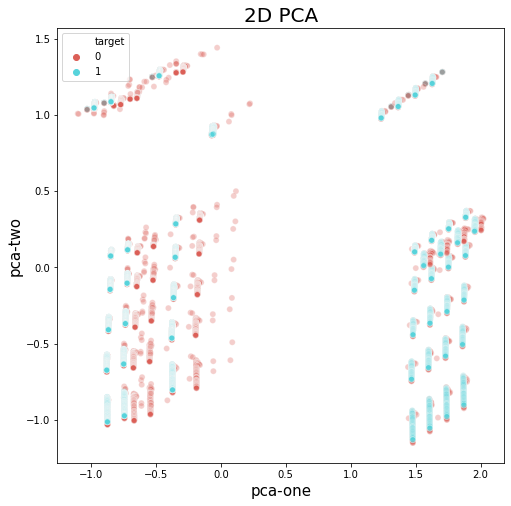

In [357]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

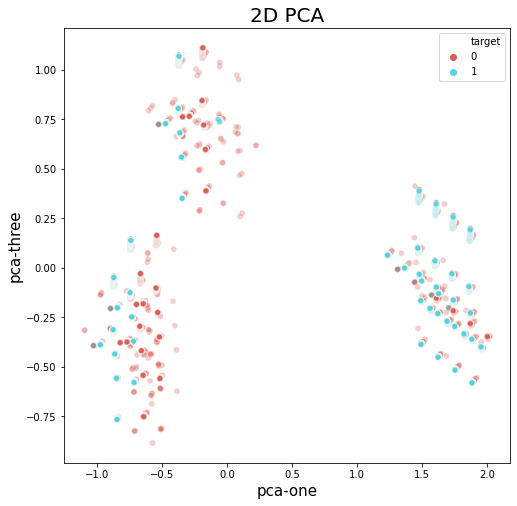

In [358]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

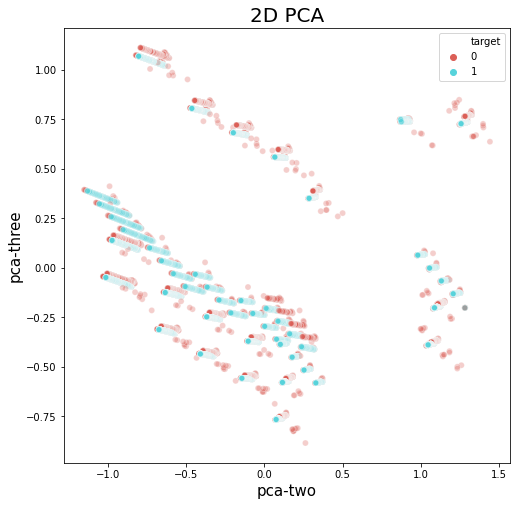

In [359]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

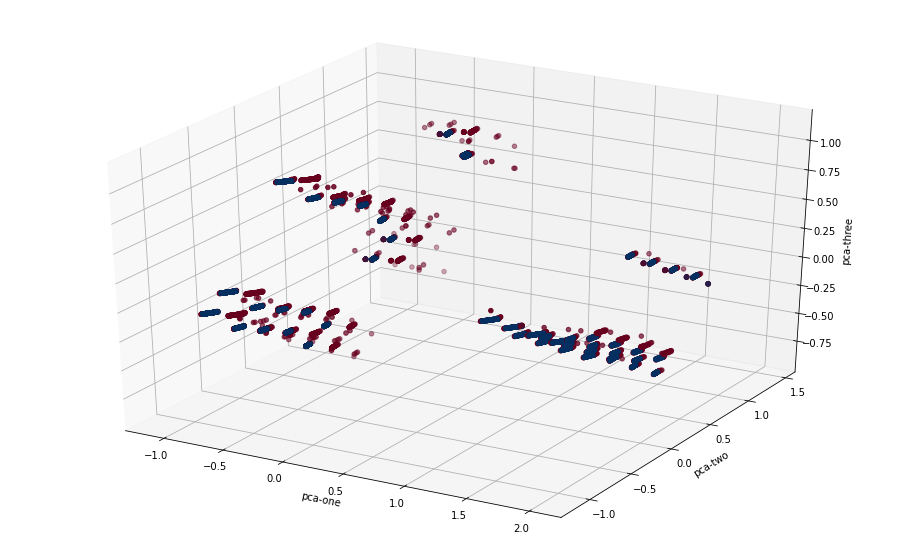

In [360]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

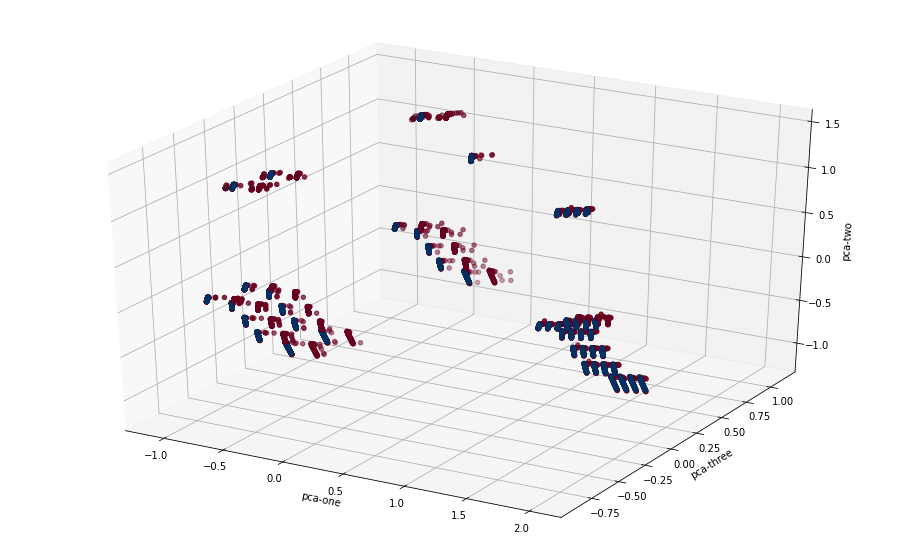

In [361]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

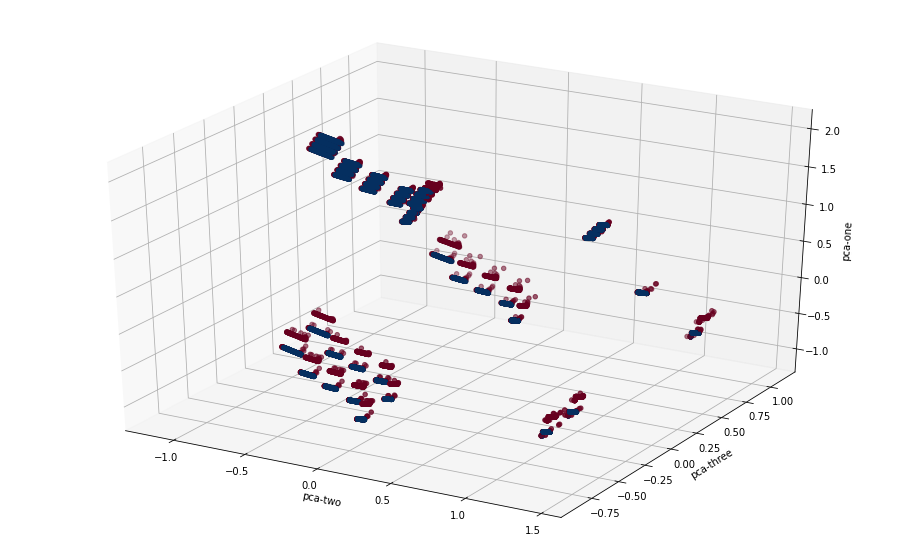

In [362]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [363]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 43.30154800415039 seconds


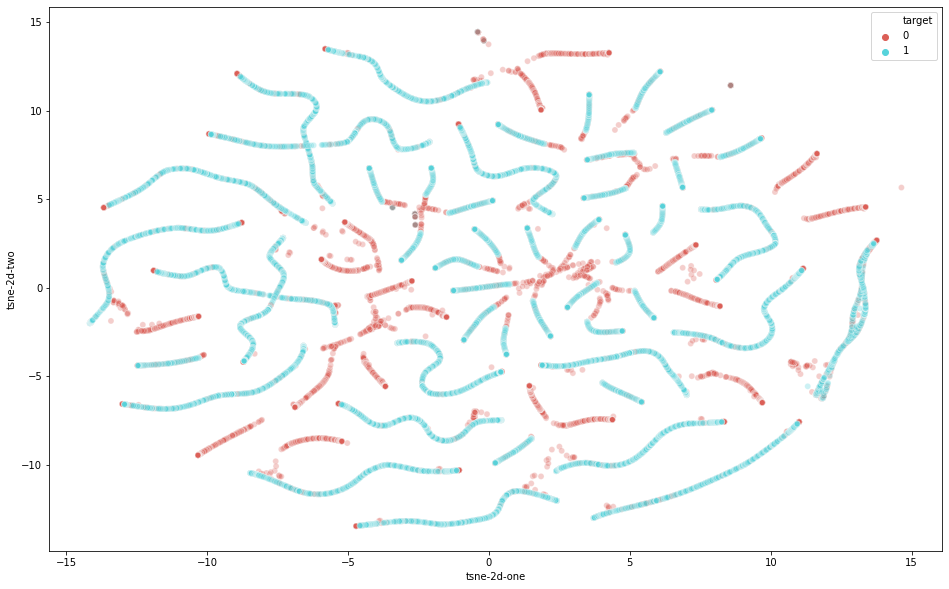

In [364]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

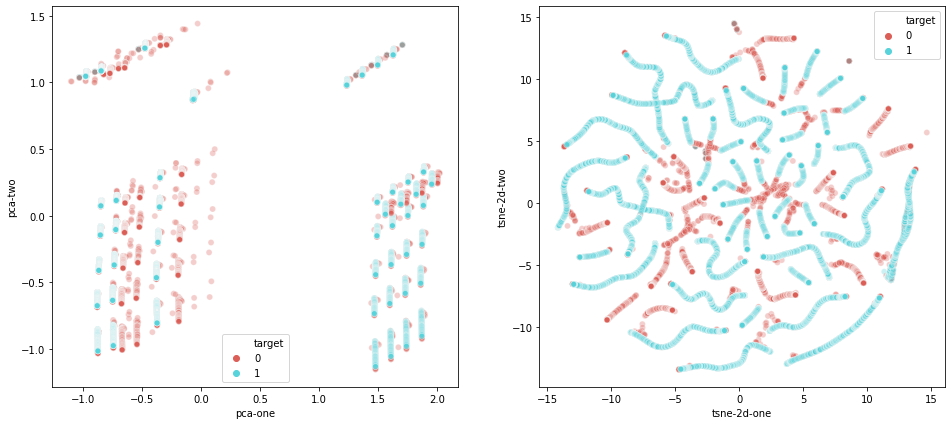

In [365]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [366]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 40.00583267211914 seconds


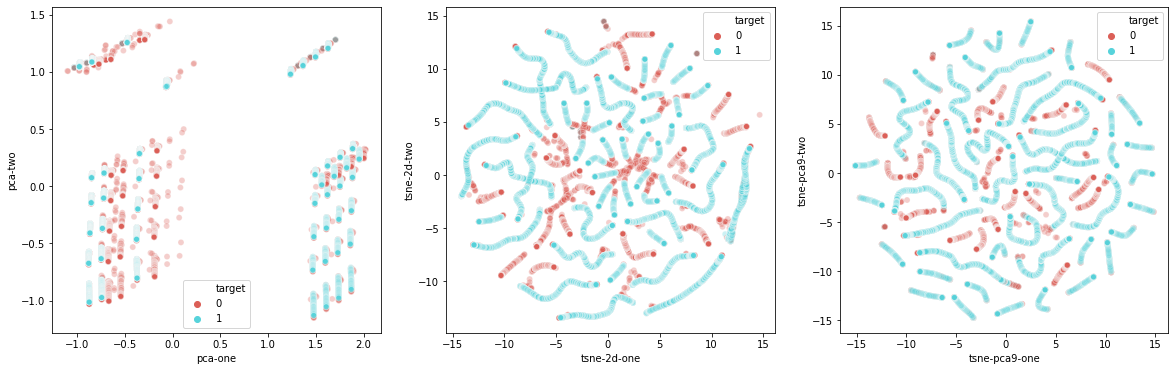

In [367]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [369]:
train_Y = df['target']
train_Y.value_counts()

1    8166
0    7967
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
16            max_packet_count  349.002779
14           packet_count_decr  177.570034
15           packet_count_incr  171.432745
17          packet_count_index  143.671018
18            packet_max_index   88.785535
10                   hop_count   59.308676
11                 current_hop   39.075538
13                enqueue_time    6.295973
9                 traversal_id    1.760540
12              hop_percentage    1.099670
6                           vc    0.724458
24               vnet_vc_index    0.724458
19                  port_index    0.632478
22             traversal_index    0.561558
3                      flit_id    0.211313
20  cache_coherence_flit_index    0.145127
21                  flit_index    0.124668


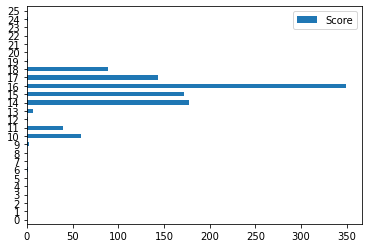

In [372]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [375]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [376]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 74.12831241283125
Test Prediction  72.76107840099164


In [377]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
12,hop_percentage,20.084629
7,dst_ni,15.100795
0,outport,11.231281
10,hop_count,8.993079
4,flit_type,4.390860
20,cache_coherence_flit_index,3.256101
2,cache_coherence_type,1.267529
23,cache_coherence_vnet_index,1.267529
25,vnet_vc_cc_index,1.267529
5,vnet,0.000000


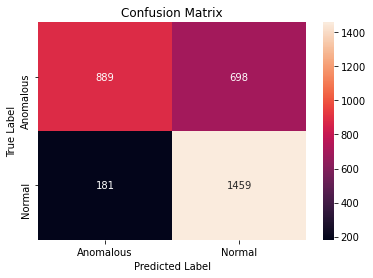

In [378]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67      1587
           1       0.68      0.89      0.77      1640

    accuracy                           0.73      3227
   macro avg       0.75      0.72      0.72      3227
weighted avg       0.75      0.73      0.72      3227



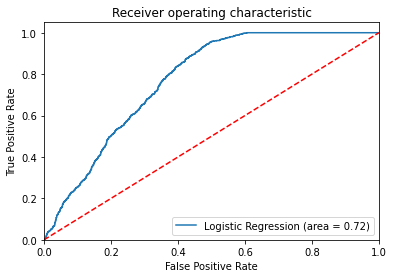

In [380]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [381]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [383]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 80.67565473423214
Test Prediction  71.21165168887512


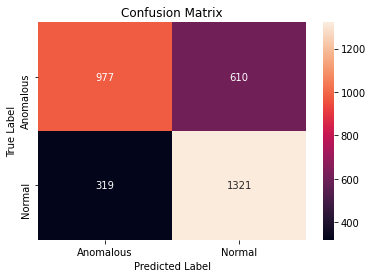

In [384]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [385]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1587
           1       0.68      0.81      0.74      1640

    accuracy                           0.71      3227
   macro avg       0.72      0.71      0.71      3227
weighted avg       0.72      0.71      0.71      3227



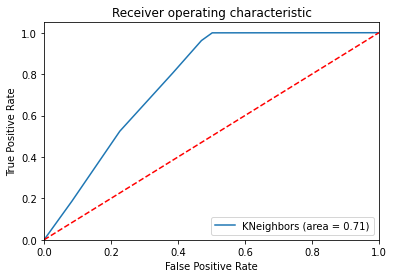

In [386]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [388]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [390]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 58.18224081822409
Test Prediction Score 58.2274558413387


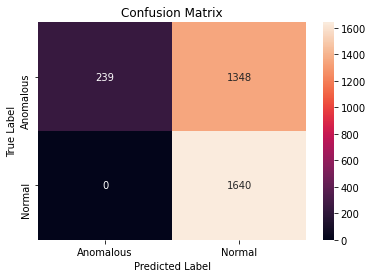

In [391]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [392]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26      1587
           1       0.55      1.00      0.71      1640

    accuracy                           0.58      3227
   macro avg       0.77      0.58      0.49      3227
weighted avg       0.77      0.58      0.49      3227



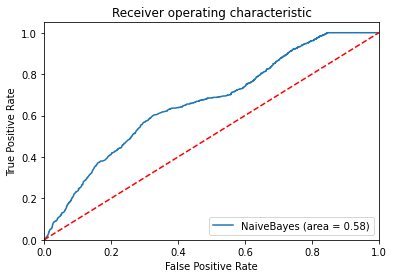

In [393]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [395]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 10324 samples, validate on 2582 samples
Epoch 1/10
10324/10324 [==============================] - 0s 43us/step - loss: 0.2521 - accuracy: 0.5059 - val_loss: 0.2512 - val_accuracy: 0.5066
Epoch 2/10
10324/10324 [==============================] - 0s 36us/step - loss: 0.2488 - accuracy: 0.5289 - val_loss: 0.2490 - val_accuracy: 0.5229
Epoch 3/10
10324/10324 [==============================] - 0s 37us/step - loss: 0.2461 - accuracy: 0.5601 - val_loss: 0.2458 - val_accuracy: 0.5538
Epoch 4/10
10324/10324 [==============================] - 0s 36us/step - loss: 0.2416 - accuracy: 0.5854 - val_loss: 0.2399 - val_accuracy: 0.5825
Epoch 5/10
10324/10324 [==============================] - 0s 36us/step - loss: 0.2351 - accuracy: 0.6164 - val_loss: 0.2324 - val_accuracy: 0.6154
Epoch 6/10
10324/10324 [==============================] - 0s 37us/step - loss: 0.2282 - accuracy: 0.6548 - val_loss: 0.2251 - val_accuracy: 0.6696
Epoch 7/10
10324/10324 [==============================] - 0s 36us/ste

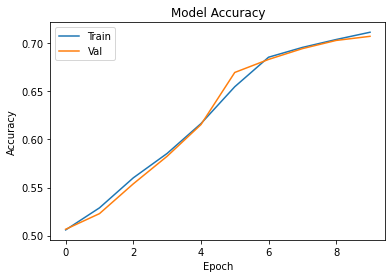

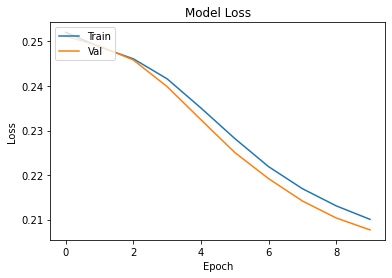

In [396]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [397]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.76%


3-Layer Neural Network

In [398]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 10324 samples, validate on 2582 samples
Epoch 1/15
10324/10324 [==============================] - 0s 40us/step - loss: 0.2492 - accuracy: 0.5032 - val_loss: 0.2490 - val_accuracy: 0.5077
Epoch 2/15
10324/10324 [==============================] - 0s 37us/step - loss: 0.2491 - accuracy: 0.5060 - val_loss: 0.2490 - val_accuracy: 0.5062
Epoch 3/15
10324/10324 [==============================] - 0s 37us/step - loss: 0.2490 - accuracy: 0.5055 - val_loss: 0.2490 - val_accuracy: 0.4942
Epoch 4/15
10324/10324 [==============================] - 0s 37us/step - loss: 0.2489 - accuracy: 0.5051 - val_loss: 0.2489 - val_accuracy: 0.4950
Epoch 5/15
10324/10324 [==============================] - 0s 36us/step - loss: 0.2488 - accuracy: 0.5081 - val_loss: 0.2488 - val_accuracy: 0.4950
Epoch 6/15
10324/10324 [==============================] - 0s 36us/step - loss: 0.2487 - accuracy: 0.5078 - val_loss: 0.2488 - val_accuracy: 0.4954
Epoch 7/15
10324/10324 [==============================] - 0s 38us/ste

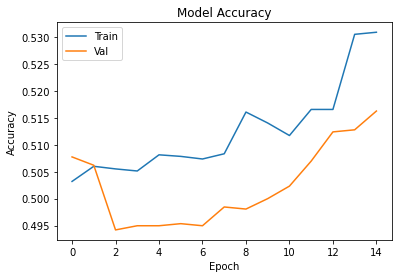

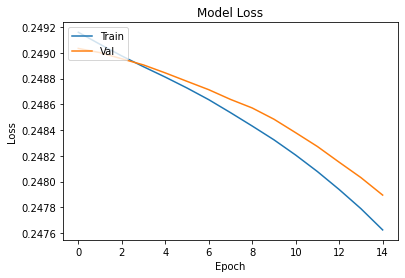

In [399]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [400]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.46%


4-Layer Neural Network



In [401]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 10324 samples, validate on 2582 samples
Epoch 1/30
10324/10324 [==============================] - 0s 44us/step - loss: 0.2498 - accuracy: 0.5036 - val_loss: 0.2498 - val_accuracy: 0.5015
Epoch 2/30
10324/10324 [==============================] - 0s 37us/step - loss: 0.2498 - accuracy: 0.5067 - val_loss: 0.2498 - val_accuracy: 0.5015
Epoch 3/30
10324/10324 [==============================] - 0s 38us/step - loss: 0.2498 - accuracy: 0.5067 - val_loss: 0.2498 - val_accuracy: 0.5015
Epoch 4/30
10324/10324 [==============================] - 0s 36us/step - loss: 0.2498 - accuracy: 0.5067 - val_loss: 0.2498 - val_accuracy: 0.5015
Epoch 5/30
10324/10324 [==============================] - 0s 37us/step - loss: 0.2498 - accuracy: 0.5067 - val_loss: 0.2498 - val_accuracy: 0.5015
Epoch 6/30
10324/10324 [==============================] - 0s 37us/step - loss: 0.2498 - accuracy: 0.5067 - val_loss: 0.2498 - val_accuracy: 0.5015
Epoch 7/30
10324/10324 [==============================] - 0s 37us/ste

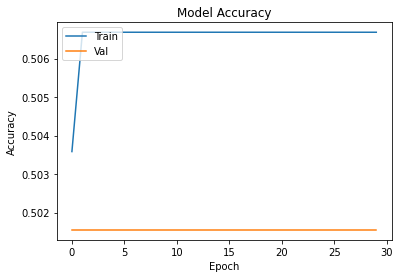

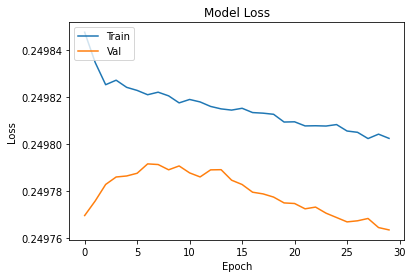

In [402]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [403]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.82%


5-Layer Neural Network Optimized

In [404]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 10324 samples, validate on 2582 samples
Epoch 1/100
10324/10324 [==============================] - 1s 114us/step - loss: 0.2016 - accuracy: 0.6825 - val_loss: 0.1864 - val_accuracy: 0.7149
Epoch 2/100
10324/10324 [==============================] - 1s 66us/step - loss: 0.1830 - accuracy: 0.7131 - val_loss: 0.1764 - val_accuracy: 0.7316
Epoch 3/100
10324/10324 [==============================] - 1s 66us/step - loss: 0.1778 - accuracy: 0.7275 - val_loss: 0.1801 - val_accuracy: 0.7281
Epoch 4/100
10324/10324 [==============================] - 1s 65us/step - loss: 0.1755 - accuracy: 0.7287 - val_loss: 0.1797 - val_accuracy: 0.7204
Epoch 5/100
10324/10324 [==============================] - 1s 65us/step - loss: 0.1740 - accuracy: 0.7367 - val_loss: 0.1732 - val_accuracy: 0.7405
Epoch 6/100
10324/10324 [==============================] - 1s 65us/step - loss: 0.1734 - accuracy: 0.7378 - val_loss: 0.1671 - val_accuracy: 0.7537
Epoch 7/100
10324/10324 [==============================] - 1s 

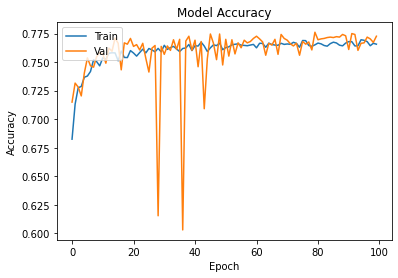

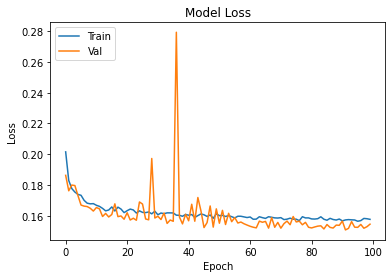

In [405]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [406]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.42%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [408]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8467379513404617


In [409]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [411]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.32000619866729
Test Prediction Score 89.12302448094205


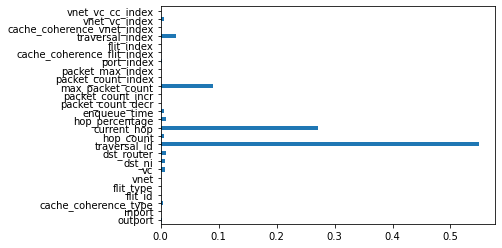

In [412]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

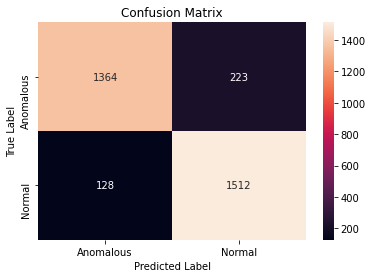

In [413]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [414]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1587
           1       0.87      0.92      0.90      1640

    accuracy                           0.89      3227
   macro avg       0.89      0.89      0.89      3227
weighted avg       0.89      0.89      0.89      3227



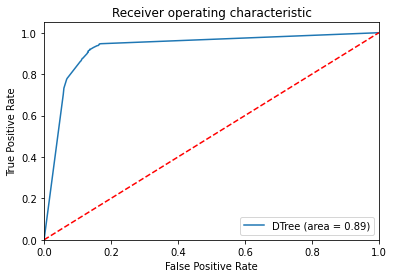

In [415]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [418]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [420]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.63582829691616
Test Prediction Score 89.64982956306167


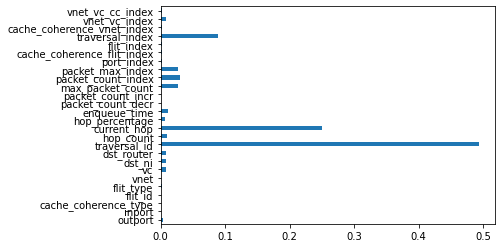

In [421]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

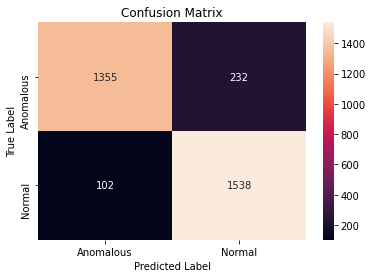

In [422]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [423]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1587
           1       0.87      0.94      0.90      1640

    accuracy                           0.90      3227
   macro avg       0.90      0.90      0.90      3227
weighted avg       0.90      0.90      0.90      3227



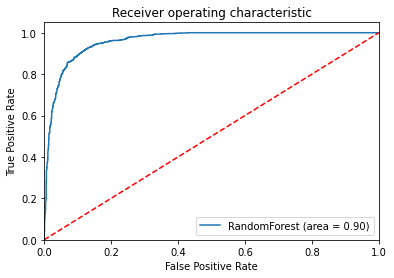

In [424]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [427]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [429]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.77529831086316
Test Prediction Score 94.82491478153084


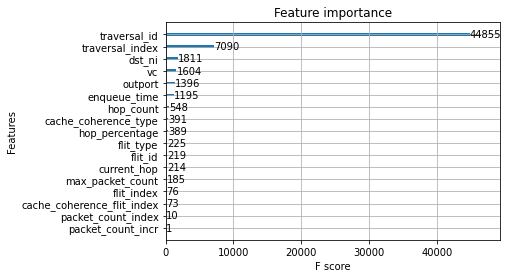

In [430]:
plot_importance(xgbc)
plt.show()

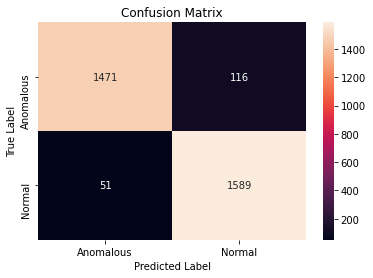

In [431]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [432]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1587
           1       0.93      0.97      0.95      1640

    accuracy                           0.95      3227
   macro avg       0.95      0.95      0.95      3227
weighted avg       0.95      0.95      0.95      3227



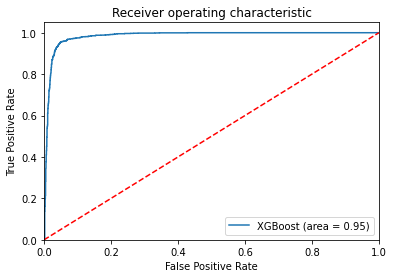

In [433]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [436]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [438]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.41577560824423
Test Prediction Score 75.45708088007437


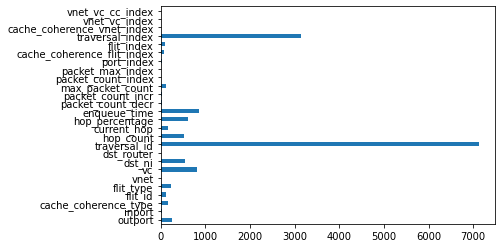

In [439]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

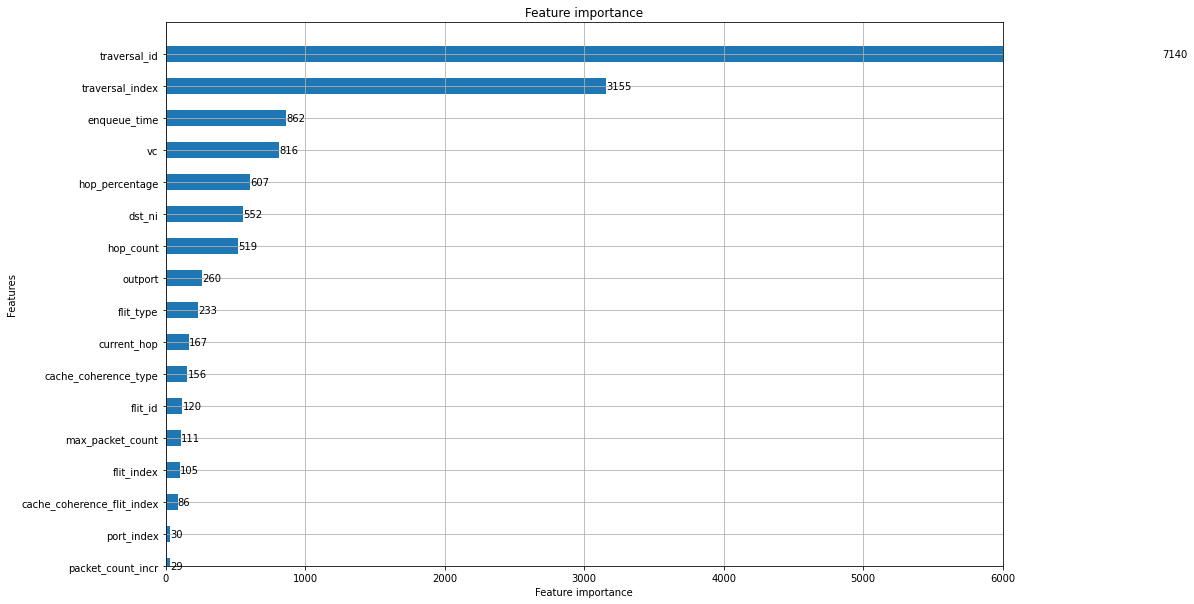

In [440]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6000), ylim = (0,17), figsize = (15,10))
plt.show()

In [441]:
sorted(gbm.feature_importances_,reverse=True)

[7140,
 3155,
 862,
 816,
 607,
 552,
 519,
 260,
 233,
 167,
 156,
 120,
 111,
 105,
 86,
 30,
 29,
 27,
 24,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

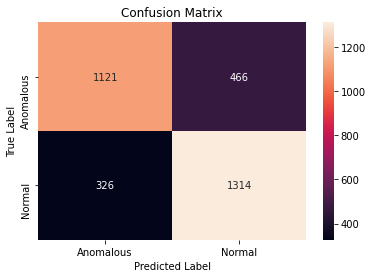

In [442]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [443]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1587
           1       0.74      0.80      0.77      1640

    accuracy                           0.75      3227
   macro avg       0.76      0.75      0.75      3227
weighted avg       0.76      0.75      0.75      3227



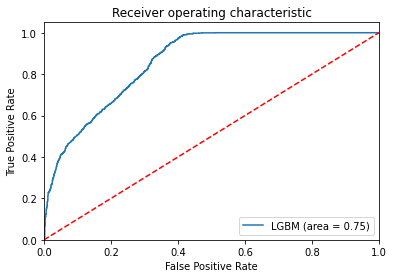

In [444]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()